In [21]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import color
from skimage import io
import scipy.ndimage as nd

In [22]:
image = color.rgb2gray(io.imread("zebras.jpg"))
image = (image - np.min(image)) / (np.max(image) - np.min(image))

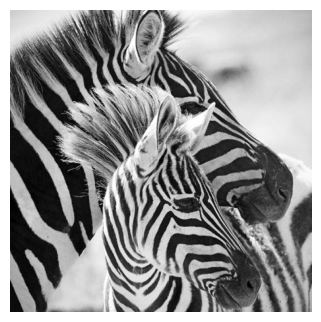

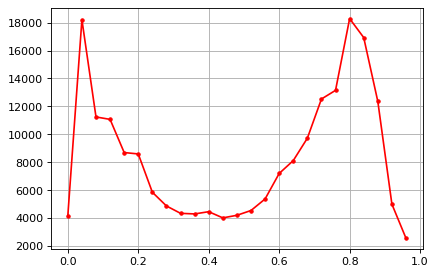

In [23]:
no_bins = 25
np_histogram, bins = np.histogram(image, bins=no_bins)


plt.figure(dpi=100)
plt.imshow(image, cmap='gray', vmin=0, vmax=1)
plt.axis('off')

plt.figure(dpi=80)
plt.plot(bins[:-1], np_histogram, "r.-")
plt.grid(True)

plt.show()

<function matplotlib.pyplot.show>

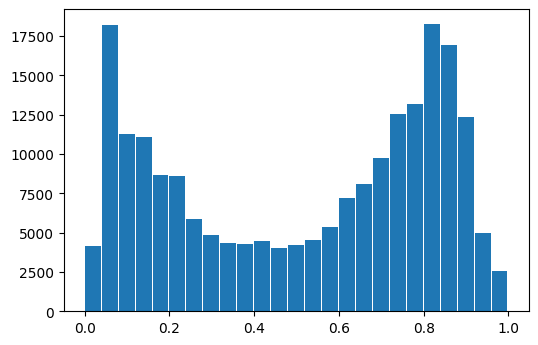

In [24]:
plt.figure(dpi=100)
plt.bar(bins[:-1], np_histogram, align='edge', width=0.0376)
plt.show

In [25]:
# algorym wyrównania histogramu
def histogram_equalization(image, bins=20):
  unique, bins, unique_counts = np.unique(image.ravel(), return_counts=True, return_inverse=True)
  dist = np.cumsum(unique_counts).astype(np.float64)       # dysrybuanta
  dist /= dist[-1]                                         # normalizacja
  equal_image = dist[bins]
  equal_image = equal_image.reshape(image.shape)
  return equal_image

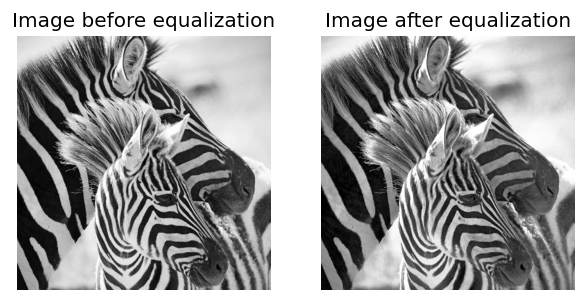

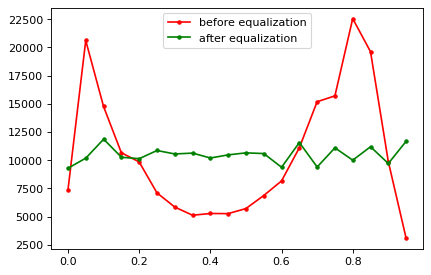

In [26]:
equal_image = histogram_equalization(image)

plt.figure(dpi=120)
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray', vmin=0, vmax=1)
plt.axis('off')
plt.title('Image before equalization')
plt.subplot(1, 2, 2)
plt.imshow(equal_image, cmap='gray', vmin=0, vmax=1)
plt.axis('off')
plt.title('Image after equalization')

no_bins = 20
hist, bins = np.histogram(image, no_bins)
equal_hist, equal_bins = np.histogram(equal_image, no_bins)

plt.figure(dpi=80)
plt.plot(bins[:-1], hist, "r.-")
plt.plot(equal_bins[:-1], equal_hist, "g.-")
plt.legend(['before equalization', 'after equalization'])

plt.show()